In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set()

In [2]:
data = pd.read_csv('./Data/Car_Sales.csv')

## Basic analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [7]:
data['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [8]:
##We have 312 different models, models can be priced differently

In [9]:
data['Registration'].unique()
# Dont think we need this for predictions

array(['yes', 'no'], dtype=object)

In [10]:
data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [11]:
#Finding null values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [12]:
#dropping null values
data_clean1 = data.dropna(axis=0)
data_clean1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [13]:
data_clean1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

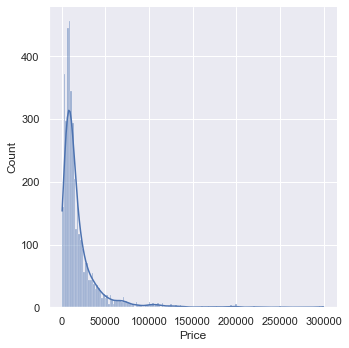

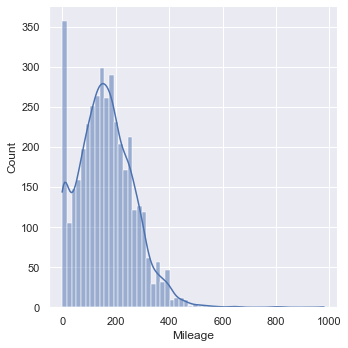

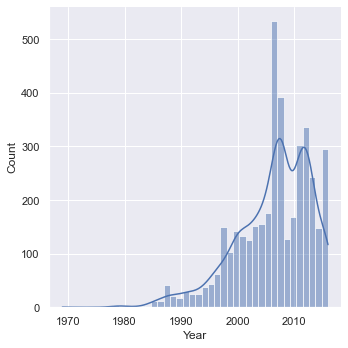

In [14]:
#Check the distributions of major columns like Price, mileage and year
sns.displot(data=data_clean1, x='Price', kde=True)
sns.displot(data=data_clean1, x='Mileage', kde=True)
sns.displot(data=data_clean1, x='Year', kde=True)
plt.show()

## Plot the scatter plot of the major columns

Text(0.5, 1.0, 'Price vs Engine Volume')

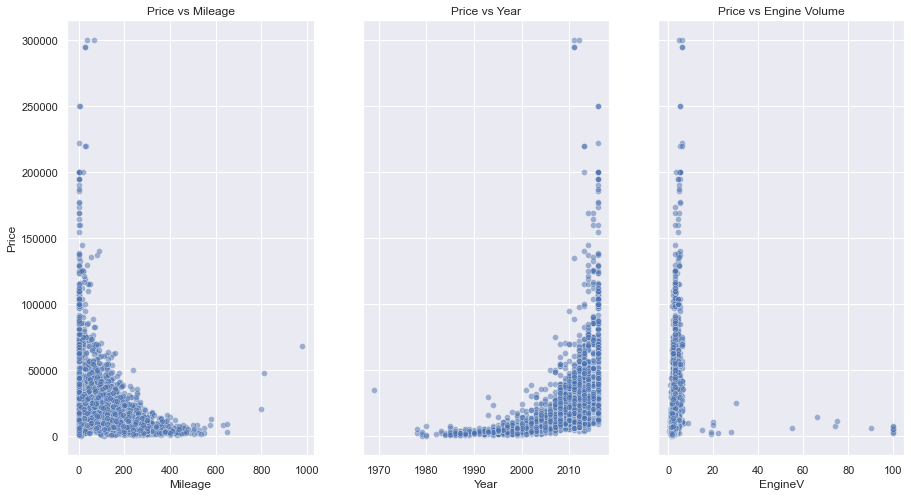

In [15]:
#Check the distributions of major columns like Price, mileage and year
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,8))
sns.scatterplot(data=data_clean1, x='Mileage',y='Price',ax=ax1,alpha=0.5)
sns.scatterplot(data=data_clean1, x='Year',y='Price',ax=ax2,alpha=0.5)
sns.scatterplot(data=data_clean1, x='EngineV',y='Price',ax=ax3,alpha=0.5)
ax1.set_title("Price vs Mileage")
ax2.set_title("Price vs Year")
ax3.set_title("Price vs Engine Volume")

## Have a few outliers in terms of price, should probally drop them for the simple regression methods
## Dont see any vintage cars in this list with high price, seems like car values get higher with how recent they were made
## Also tend to have most cars with engine volume less than 20

## Computing Quantile values of 2% of the data

In [16]:
price_q = data_clean1['Price'].quantile(0.98)
mileage_q = data_clean1['Mileage'].quantile(0.98)
year_q = data_clean1['Year'].quantile(0.02)
engine_q = data_clean1['EngineV'].quantile(0.98)
print("Upper 2 percent quantile price",price_q)
print("Upper 2 percent quantile milage range",mileage_q)
print("Lower 2 percent quantile year value",year_q)
print("Upper 2 percent quantile engine volume",engine_q)

Upper 2 percent quantile price 103999.0
Upper 2 percent quantile milage range 400.0
Lower 2 percent quantile year value 1989.0
Upper 2 percent quantile engine volume 5.5


## Maybe too many values are going to be dropped, so trim back a bit

In [17]:
price_q = data_clean1['Price'].quantile(0.994)
mileage_q = data_clean1['Mileage'].quantile(0.994)
year_q = data_clean1['Year'].quantile(0.002)
engine_q = data_clean1['EngineV'].quantile(0.9952)
print("99.4% quantile price",price_q)
print("99.4% quantile milage range",mileage_q)
print("0.2% percent quantile year value",year_q)
print("99.52% quantile engine volume",engine_q)

99.4% quantile price 168352.000000001
99.4% quantile milage range 461.71200000000044
0.2% percent quantile year value 1980.096
99.52% quantile engine volume 13.108799999999974


In [18]:
data_1 = data_clean1[data_clean1['Price']< price_q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,4000.000000,4000.000000,4000.000000,4000.00000
mean,18333.006490,164.530000,2.749890,2006.32725
std,20503.839265,102.993687,4.947335,6.68194
min,600.000000,0.000000,0.600000,1969.00000
25%,6999.000000,92.000000,1.800000,2003.00000
50%,11500.000000,159.000000,2.200000,2007.00000
75%,21500.000000,230.000000,3.000000,2011.25000
max,164500.000000,980.000000,99.990000,2016.00000


In [19]:
data_2 = data_1[data_1['Mileage']< mileage_q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3975.000000,3975.000000,3975.000000,3975.000000
mean,18383.641751,161.993459,2.752795,2006.377358
std,20523.858588,97.708743,4.962486,6.648217
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,91.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,164500.000000,460.000000,99.990000,2016.000000


In [20]:
data_3 = data_2[data_2['Year']> year_q]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3966.000000,3966.000000,3966.000000,3966.000000
mean,18410.732025,161.981594,2.754150,2006.441755
std,20533.339405,97.576468,4.967973,6.514821
min,800.000000,0.000000,0.600000,1982.000000
25%,7000.000000,91.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,164500.000000,460.000000,99.990000,2016.000000


In [21]:
data_4 = data_3[data_3['EngineV']< engine_q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3946.000000,3946.000000,3946.000000,3946.000000
mean,18467.824939,161.752661,2.455659,2006.460466
std,20566.217333,97.598368,0.963761,6.512313
min,800.000000,0.000000,0.600000,1982.000000
25%,7000.000000,91.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21587.500000,230.000000,3.000000,2012.000000
max,164500.000000,460.000000,9.000000,2016.000000


Text(0.5, 1.0, 'Price vs Engine Volume')

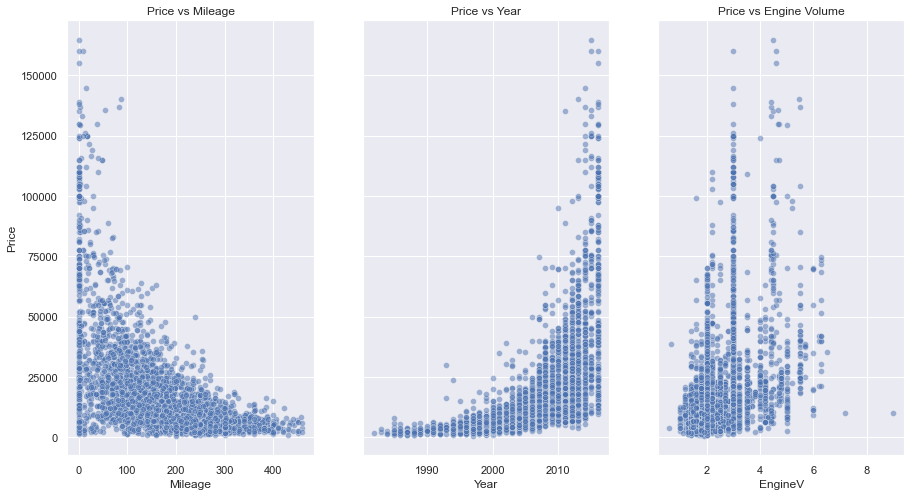

In [22]:
#Check the distributions of major columns like Price, mileage and year again after dropping values
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,8))
sns.scatterplot(data=data_4, x='Mileage',y='Price',ax=ax1,alpha=0.5)
sns.scatterplot(data=data_4, x='Year',y='Price',ax=ax2,alpha=0.5)
sns.scatterplot(data=data_4, x='EngineV',y='Price',ax=ax3,alpha=0.5)
ax1.set_title("Price vs Mileage")
ax2.set_title("Price vs Year")
ax3.set_title("Price vs Engine Volume")

In [23]:
#Checking info for data before dropping
data_clean1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [24]:
#Checking info for data after dropping
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3946,3946.000000,3946,3946.000000,3946.000000,3946,3946,3946.000000,3946
unique,7,NaN,6,NaN,NaN,4,2,NaN,300
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,866,NaN,1506,NaN,NaN,1831,3581,NaN,184
mean,NaN,18467.824939,NaN,161.752661,2.455659,NaN,NaN,2006.460466,NaN
std,NaN,20566.217333,NaN,97.598368,0.963761,NaN,NaN,6.512313,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1982.000000,NaN
25%,NaN,7000.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21587.500000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [25]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [26]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3941,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3942,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3943,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3944,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


## Checking OLS assumptions

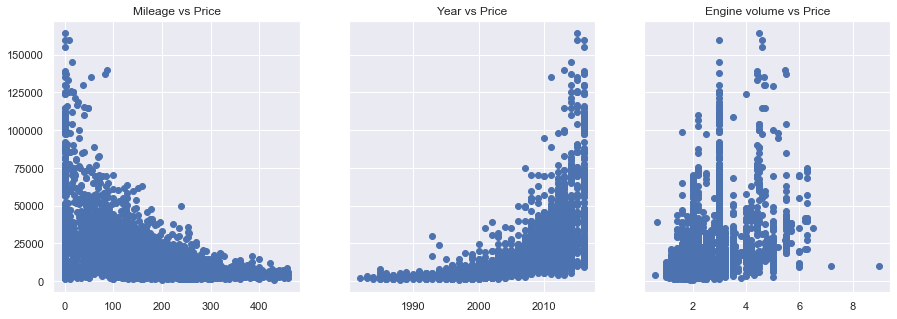

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage vs Price')
ax2.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.set_title('Year vs Price')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('Engine volume vs Price')
plt.show()

### Take the log price to transform them for fitting into a linear model

In [28]:
data_cleaned['log_price'] = np.log(data_cleaned['Price'])

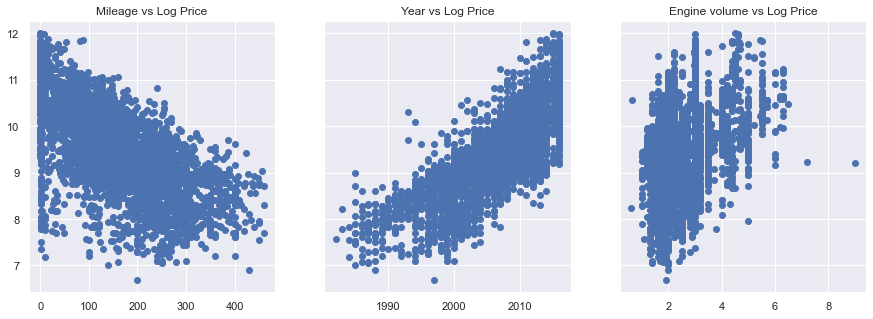

In [29]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('Mileage vs Log Price')
ax2.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax2.set_title('Year vs Log Price')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax3.set_title('Engine volume vs Log Price')
plt.show()

In [30]:
#Delete the temp data frames
del data_1,data_2,data_3,data_4

In [31]:
#testing what double logs look like
#del data_log
data_log = data_cleaned
data_log['log_price']= np.log(data_cleaned['Price'])
data_log['log_mileage']= np.log(data_cleaned['Mileage'])
data_log['log_enginev']= np.log(data_cleaned['EngineV'])
data_log['log_year']= np.log(data_cleaned['Year'])

C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
data_log

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price,log_mileage,log_enginev,log_year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840,5.624018,0.693147,7.596392
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618,6.056784,1.064711,7.600402
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519,5.880533,1.609438,7.602401
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249,5.480639,1.435085,7.604396
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656,4.787492,0.693147,7.606387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556,3.555348,0.470004,7.607878
3942,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069,2.197225,1.098612,7.607878
3943,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557,0.000000,1.252763,7.600402
3944,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,8.987197,5.267858,0.693147,7.593374


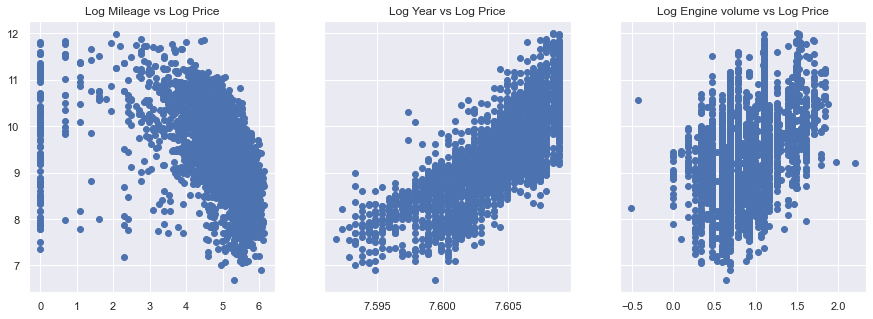

In [33]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data_cleaned['log_mileage'],data_cleaned['log_price'])
ax1.set_title('Log Mileage vs Log Price')
ax2.scatter(data_cleaned['log_year'],data_cleaned['log_price'])
ax2.set_title('Log Year vs Log Price')
ax3.scatter(data_cleaned['log_enginev'],data_cleaned['log_price'])
ax3.set_title('Log Engine volume vs Log Price')
plt.show()

## Log Log values dont look any better so delete it

In [34]:
del data_log

## Let's drop price from the data since we are using log price

In [35]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

## Checking multicollinearity using variance inflation factor

In [36]:
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.719639,Mileage
1,10.258870,Year
2,7.495360,EngineV


In [37]:
## The year has high VIF so we can drop it initially, but however this does not make sense, car prices vary a lot by year 
## Can come back to this later

In [38]:
# THe Year has a high VIF so lets drop it
data_no_multi = data_cleaned.drop(['Year','log_mileage','log_enginev','log_year'],axis=1)
data_no_multi

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...
3941,Toyota,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3942,Mercedes-Benz,sedan,9,3.0,Diesel,yes,S 350,11.736069
3943,BMW,sedan,1,3.5,Petrol,yes,535,8.779557
3944,BMW,sedan,194,2.0,Petrol,yes,520,8.987197


In [39]:
## Can drop the models as well since there are quite a few of them
data_no_multi = data_no_multi.drop(['Model'],axis=1)
data_no_multi.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [40]:
## Can drop the registration as well doubt it has much use
data_no_multi = data_no_multi.drop(['Registration'],axis=1)
data_no_multi.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


## Creating dummy variable

In [41]:
data_with_dummy = pd.get_dummies(data_no_multi, drop_first=True)
data_with_dummy.shape[1]

17

In [42]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [43]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']
data_preprocessed= data_with_dummy[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Create the Regression

In [44]:
X = data_preprocessed.drop(['log_price'],axis=1)
y = data_preprocessed['log_price']

In [45]:
#Split the data before transforming it
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [47]:
#Using non log price for test regression just to see how bad it is
target_no_transform = np.exp(data_cleaned['log_price'])
target_no_transform
x_train_t1,x_test_t1,y_train_t1,y_test_t1 = train_test_split(X, target_no_transform, test_size=0.2, random_state=101)
scalar2 = StandardScaler()
x_train_t1 = scalar2.fit_transform(x_train_t1)
x_test_t1 = scalar2.transform(x_test_t1)

In [48]:
#Basic linear regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
reg_no_transform = LinearRegression()
reg_no_transform.fit(x_train_t1,y_train_t1)

LinearRegression()

In [50]:
y_hat=reg.predict(x_train)
y_hat_no_transform=reg_no_transform.predict(x_train_t1)

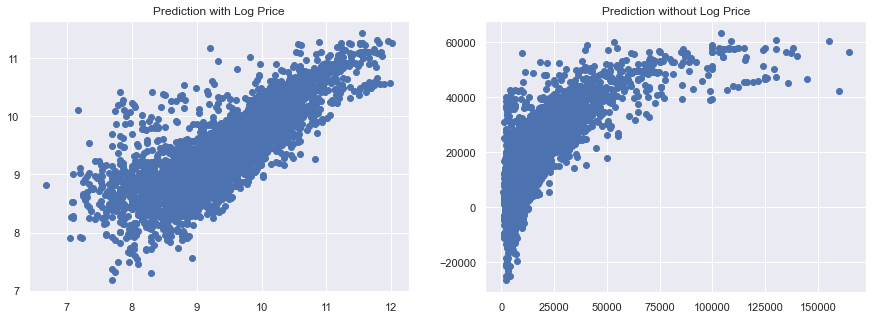

In [51]:
f,(ax1,ax2)= plt.subplots(1,2,sharey=False,figsize=(15,5))
ax1.scatter(y_train,y_hat)
ax1.set_title('Prediction with Log Price')
ax2.scatter(y_train_t1,y_hat_no_transform)
ax2.set_title('Prediction without Log Price')
plt.show()

### The predictions without transforming price looks bad

### Lets Plot the residuals

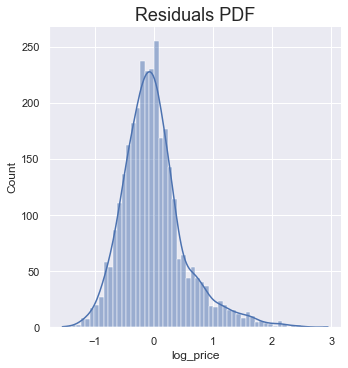

In [52]:
sns.displot(data=y_hat-y_train,kde=True)
plt.title("Residuals PDF", size=18)
plt.show()

In [53]:
print("The R2 of the data with price transformed",reg.score(x_train,y_train))
print("The R2 of the data with price not transformed",reg.score(x_train_t1,y_train_t1))

The R2 of the data with price transformed 0.6353369646113183
The R2 of the data with price not transformed -0.7965074215135439


In [85]:
#Compute the MAE and MSE errors from the predictions with log price
y_test_exp = np.exp(y_test)
pred = reg.predict(x_test)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 7046.353546264941
Root mean square Error: 12997.996470142065


### The R2 shows the model can explain 63% of the data

## Lets check the R2 with the registration info

In [62]:
data_no_multi_v2 = data_cleaned.drop(['Year','log_mileage','log_enginev','log_year','Model'],axis=1)
data_with_dummy_v2 = pd.get_dummies(data_no_multi_v2, drop_first=True)
data_preprocessed_v2= data_with_dummy_v2

X_v2 = data_preprocessed_v2.drop(['log_price'],axis=1)
y_v2 = data_preprocessed_v2['log_price']

#Split the data before transforming it
x_train_v2,x_test_v2,y_train_v2,y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=101)

scalar3 = StandardScaler()
x_train_v2 = scalar3.fit_transform(x_train_v2)
x_test_v2 = scalar3.transform(x_test_v2)

#Basic linear regression
reg3 = LinearRegression()
reg3.fit(x_train_v2,y_train_v2)

y_hat_v2=reg3.predict(x_train_v2)

print("The R2 of the data with price transformed and registration included",reg3.score(x_train_v2,y_train_v2))

The R2 of the data with price transformed and registration included 0.7370622526324375


In [87]:
#Compute the MAE and MSE errors from the predictions with log price
y_test_exp = np.exp(y_test_v2)
pred = reg3.predict(x_test_v2)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 6345.085142343881
Root mean square Error: 12693.703244577267


## Looks like adding the registration can raise the R2 from 63% to 73%, maybe it does have some value after all. The MAE and RMSE is a bit lower as well.

## Lets add in the year along with registration

In [64]:
data_no_multi_v3 = data_cleaned.drop(['log_mileage','log_enginev','log_year','Model'],axis=1)
data_with_dummy_v3 = pd.get_dummies(data_no_multi_v3, drop_first=True)


data_preprocessed_v3= data_with_dummy_v3

X_v3 = data_preprocessed_v3.drop(['log_price'],axis=1)
y_v3 = data_preprocessed_v3['log_price']

#Split the data before transforming it
x_train_v3,x_test_v3,y_train_v3,y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.2, random_state=101)

scalar4 = StandardScaler()
x_train_v3 = scalar4.fit_transform(x_train_v3)
x_test_v3 = scalar4.transform(x_test_v3)

#Basic linear regression
reg4 = LinearRegression()
reg4.fit(x_train_v3,y_train_v3)

y_hat_v3=reg4.predict(x_train_v3)

print("The R2 of the data with price transformed and year/registration included",reg4.score(x_train_v3,y_train_v3))


The R2 of the data with price transformed and year/registration included 0.8856205877444019


In [88]:
#Compute the MAE and MSE errors from the predictions with log price
y_test_exp = np.exp(y_test_v3)
pred = reg4.predict(x_test_v3)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 4973.497742813923
Root mean square Error: 10994.59584049744


In [89]:
### Find weights and biases for this model

In [90]:
reg_summary = pd.DataFrame(X_v3.columns.values, columns=['Features'])
reg_summary['Weights']= reg4.coef_
from sklearn.feature_selection import f_regression
reg_summary['P values'] = f_regression(x_train_v3,y_train_v3)[1].round(3)
reg_summary['F Statistics'] = f_regression(x_train_v3, y_train_v3)[0]
reg_summary['Bias'] = reg4.intercept_
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
reg_summary

,Features,Weights,P values,F Statistics,Bias
0,Mileage,-0.119239,0.000,1817.625991,9.390849
1,EngineV,0.217303,0.000,712.025583,9.390849
2,Year,0.514423,0.000,4003.376855,9.390849
3,Brand_BMW,0.030893,0.000,20.911797,9.390849
4,Brand_Mercedes-Benz,0.011611,0.000,70.149928,9.390849
5,Brand_Mitsubishi,-0.130075,0.000,20.282775,9.390849
6,Brand_Renault,-0.199132,0.000,135.319241,9.390849
7,Brand_Toyota,-0.070632,0.000,73.866809,9.390849
8,Brand_Volkswagen,-0.099988,0.000,39.610768,9.390849
9,Body_hatch,-0.097161,0.000,78.155176,9.390849


### Adding the year bumps up the R2 from 73% to 88% of the model that can be predicted with this regression

## Why stop here, lets bring in the 300 odd model numbers as well
## This is quite problematic considering so many model numbers, would be better to classify them into a hand full of  categories say low end, mid range, premium, high end cars.
## If time permits can probally try that sometime but lets see where this goes

In [91]:
data_no_multi_v4 = data_cleaned.drop(['log_mileage','log_enginev','log_year'],axis=1)
data_with_dummy_v4 = pd.get_dummies(data_no_multi_v4, drop_first=True)


data_preprocessed_v4= data_with_dummy_v4

X_v4 = data_preprocessed_v4.drop(['log_price'],axis=1)
y_v4 = data_preprocessed_v4['log_price']

#Split the data before transforming it
x_train_v4,x_test_v4,y_train_v4,y_test_v4 = train_test_split(X_v4, y_v4, test_size=0.2, random_state=101)

scalar5 = StandardScaler()
x_train_v4 = scalar5.fit_transform(x_train_v4)
x_test_v4 = scalar5.transform(x_test_v4)

#Basic linear regression
reg5 = LinearRegression()
reg5.fit(x_train_v4,y_train_v4)

y_hat_v4=reg5.predict(x_train_v4)

print("The R2 of the data with price transformed and year/registration/model included",reg5.score(x_train_v4,y_train_v4))


The R2 of the data with price transformed and year/registration/model included 0.9419152063163303


### Models bumps this up from 88% to 94% of the model that can be predicted

### Find weights and biases

In [92]:
reg_summary = pd.DataFrame(X_v4.columns.values, columns=['Features'])
reg_summary['Weights']= reg5.coef_
from sklearn.feature_selection import f_regression
reg_summary['P values'] = f_regression(x_train_v4,y_train_v4)[1].round(3)
reg_summary['F Statistics'] = f_regression(x_train_v4, y_train_v4)[0]
reg_summary['Bias'] = reg5.intercept_
reg_summary

,Features,Weights,P values,F Statistics,Bias
0,Mileage,-7.625776e-02,0.000,1817.625991,9.390916
1,EngineV,5.149422e-02,0.000,712.025583,9.390916
2,Year,5.595475e-01,0.000,4003.376855,9.390916
3,Brand_BMW,-5.503233e+11,0.000,20.911797,9.390916
4,Brand_Mercedes-Benz,-5.932416e+11,0.000,70.149928,9.390916
5,Brand_Mitsubishi,7.184477e+10,0.000,20.282775,9.390916
6,Brand_Renault,-1.925645e+12,0.000,135.319241,9.390916
7,Brand_Toyota,1.517679e+12,0.000,73.866809,9.390916
8,Brand_Volkswagen,-1.264160e+12,0.000,39.610768,9.390916
9,Body_hatch,6.713867e-03,0.000,78.155176,9.390916


In [95]:
#Compute the MAE and MSE errors from the predictions with log price
y_test_exp = np.exp(y_test_v4)
pred = reg5.predict(x_test_v4)
pred_exp = np.exp(pred)
# MAE = mean_absolute_error(y_test_exp,pred_exp)
# MSE = mean_squared_error(y_test_exp,pred_exp)
# RMSE = np.sqrt(MSE)
# print('Mean Absolute Error:',MAE)
# print('Root mean square Error:',RMSE)

##Model might be unstable lets see if we have nan values

pred_exp_df = pd.DataFrame(data=pred_exp)
np.isinf(pred_exp_df).sum()

C:\Users\Fabian\AppData\Local\Temp\ipykernel_12196\3209184751.py:4: RuntimeWarning: overflow encountered in exp
  pred_exp = np.exp(pred)


0    14
dtype: int64

In [101]:
linear_mod_pred_df = pd.DataFrame(data=pred_exp,columns=['Predicted price'])
print(linear_mod_pred_df.nlargest(14,columns='Predicted price'))
print('Some predictions are bad due to adding model info data(side effect of having so 300 odd models as dummies), lets get those indexes \n', linear_mod_pred_df.nlargest(14,columns='Predicted price').index)

     Predicted price
25               inf
170              inf
180              inf
205              inf
348              inf
368              inf
370              inf
469              inf
470              inf
578              inf
589              inf
670              inf
729              inf
741              inf
Some predictions are bad due to adding model info data(side effect of having so 300 odd models as dummies), lets get those indexes 
 Int64Index([25, 170, 180, 205, 348, 368, 370, 469, 470, 578, 589, 670, 729,
            741],
           dtype='int64')


## Looks like we have 14 infinity values, with so many models of cars our model is not too stable
1. Can have more data and this will be overcome since we will have enough of data per model of car
2. Narrow down the models to a hand full as explained before

In [103]:
## Lets drop them from the test data and check the good predictions
## Need to reset the index since the index for infinity values we got were sequential
## So reset y test index to sequential numbers instead of the jumbled ones
y_test_exp_dropped = y_test_exp.reset_index(drop=True)
y_test_exp_dropped = y_test_exp_dropped.drop([25, 170, 180, 205, 348, 368, 370, 469, 470, 578, 589, 670, 729, 741])

y_test_exp_dropped.shape

(776,)

In [104]:
## Lets drop similar index values from predicted data
linear_mod_pred_dropped_df = linear_mod_pred_df.drop([25, 170, 180, 205, 348, 368, 370, 469, 470, 578, 589, 670, 729, 741])
linear_mod_pred_dropped_df.shape

(776, 1)

In [105]:
## Lets reshape this back similar to before a rank 1 matrix
linear_mod_pred_dropped_df2 = np.squeeze(linear_mod_pred_dropped_df)
linear_mod_pred_dropped_df2.shape

(776,)

In [106]:
#Compute the MAE and RMSE without those 14 values
MAE = mean_absolute_error(y_test_exp_dropped,linear_mod_pred_dropped_df2)
MSE = mean_squared_error(y_test_exp_dropped,linear_mod_pred_dropped_df2)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 3338.17332122527
Root mean square Error: 7887.648834787933


### Seems to do better when it can predict things but a bit unstable as expected

### Check the prediction vs actual prices

Text(0, 0.5, 'Prediction (y_hat_test)')

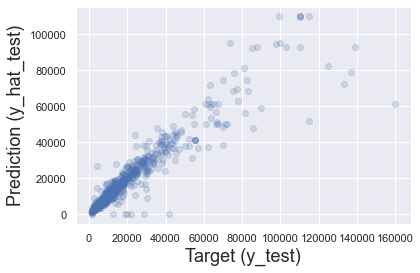

In [107]:
plt.scatter(y_test_exp_dropped,linear_mod_pred_dropped_df2, alpha=0.2)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)
# plt.xlim(6,13)
# plt.ylim(6,13)

## Seems like we have more issues with cars prices greater than $100000

## Lets ignore the models of cars for some more stability and see if we can use other methods for predictions

In [120]:
#Elastic net baseline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
elastic_mod = ElasticNet()
elastic_param = {'alpha':[0.01,0.1,0.5,1,5,10],
                'l1_ratio':[0.01,0.1,0.5,0.9,1]}
grid_elastic = GridSearchCV(elastic_mod,elastic_param,scoring='neg_mean_squared_error')
grid_elastic.fit(x_train_v3,y_train_v3)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [121]:
y_test_exp = np.exp(y_test_v3)
pred = grid_elastic.predict(x_test_v3)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 5006.167405328358
Root mean square Error: 11085.79572446047


In [122]:
grid_elastic.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

## Its leaning towards ridge regression, lets try that one instead

In [129]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_param = {'alpha':np.logspace(-3,0,20)}

grid_ridge = GridSearchCV(ridge_model,ridge_param,scoring='neg_mean_absolute_error', n_jobs=-1)
grid_ridge.fit(x_train_v3,y_train_v3)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])},
             scoring='neg_mean_absolute_error')

In [130]:
y_test_exp = np.exp(y_test_v3)
pred = grid_ridge.predict(x_test_v3)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

Mean Absolute Error: 4973.498713256566
Root mean square Error: 10994.59852626512


In [131]:
grid_ridge.best_params_

{'alpha': 0.001}

## Its falling back to a linear model with no regularization

# Lets see a simple deep learning dense model

In [151]:
import tensorflow as tf
input_size = x_train_v3.shape[1]
model=tf.keras.Sequential([tf.keras.layers.Dense(512,input_shape=(input_size,), activation='relu'),
                            tf.keras.layers.Dense(512, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

batch_size = 64
max_epochs = 200

model.fit(x_train_v3,
         y_train_v3,
         batch_size = batch_size,
         epochs=max_epochs,
         verbose=2)

Epoch 1/200
50/50 - 1s - loss: 2.0768 - mean_absolute_error: 2.0768 - 810ms/epoch - 16ms/step
Epoch 2/200
50/50 - 0s - loss: 0.3663 - mean_absolute_error: 0.3663 - 375ms/epoch - 7ms/step
Epoch 3/200
50/50 - 0s - loss: 0.2729 - mean_absolute_error: 0.2729 - 362ms/epoch - 7ms/step
Epoch 4/200
50/50 - 0s - loss: 0.2488 - mean_absolute_error: 0.2488 - 354ms/epoch - 7ms/step
Epoch 5/200
50/50 - 0s - loss: 0.2369 - mean_absolute_error: 0.2369 - 350ms/epoch - 7ms/step
Epoch 6/200
50/50 - 0s - loss: 0.2226 - mean_absolute_error: 0.2226 - 375ms/epoch - 7ms/step
Epoch 7/200
50/50 - 0s - loss: 0.2241 - mean_absolute_error: 0.2241 - 372ms/epoch - 7ms/step
Epoch 8/200
50/50 - 0s - loss: 0.2153 - mean_absolute_error: 0.2153 - 358ms/epoch - 7ms/step
Epoch 9/200
50/50 - 0s - loss: 0.2232 - mean_absolute_error: 0.2232 - 346ms/epoch - 7ms/step
Epoch 10/200
50/50 - 0s - loss: 0.2423 - mean_absolute_error: 0.2423 - 355ms/epoch - 7ms/step
Epoch 11/200
50/50 - 0s - loss: 0.2252 - mean_absolute_error: 0.2252

Epoch 89/200
50/50 - 0s - loss: 0.1793 - mean_absolute_error: 0.1793 - 358ms/epoch - 7ms/step
Epoch 90/200
50/50 - 0s - loss: 0.1736 - mean_absolute_error: 0.1736 - 355ms/epoch - 7ms/step
Epoch 91/200
50/50 - 0s - loss: 0.1792 - mean_absolute_error: 0.1792 - 360ms/epoch - 7ms/step
Epoch 92/200
50/50 - 0s - loss: 0.1763 - mean_absolute_error: 0.1763 - 371ms/epoch - 7ms/step
Epoch 93/200
50/50 - 0s - loss: 0.1673 - mean_absolute_error: 0.1673 - 364ms/epoch - 7ms/step
Epoch 94/200
50/50 - 0s - loss: 0.1724 - mean_absolute_error: 0.1724 - 363ms/epoch - 7ms/step
Epoch 95/200
50/50 - 0s - loss: 0.1810 - mean_absolute_error: 0.1810 - 346ms/epoch - 7ms/step
Epoch 96/200
50/50 - 0s - loss: 0.1762 - mean_absolute_error: 0.1762 - 365ms/epoch - 7ms/step
Epoch 97/200
50/50 - 0s - loss: 0.1840 - mean_absolute_error: 0.1840 - 366ms/epoch - 7ms/step
Epoch 98/200
50/50 - 0s - loss: 0.1752 - mean_absolute_error: 0.1752 - 379ms/epoch - 8ms/step
Epoch 99/200
50/50 - 0s - loss: 0.1871 - mean_absolute_error

Epoch 176/200
50/50 - 0s - loss: 0.1695 - mean_absolute_error: 0.1695 - 349ms/epoch - 7ms/step
Epoch 177/200
50/50 - 0s - loss: 0.1611 - mean_absolute_error: 0.1611 - 348ms/epoch - 7ms/step
Epoch 178/200
50/50 - 0s - loss: 0.1574 - mean_absolute_error: 0.1574 - 354ms/epoch - 7ms/step
Epoch 179/200
50/50 - 0s - loss: 0.1538 - mean_absolute_error: 0.1538 - 347ms/epoch - 7ms/step
Epoch 180/200
50/50 - 0s - loss: 0.1576 - mean_absolute_error: 0.1576 - 353ms/epoch - 7ms/step
Epoch 181/200
50/50 - 0s - loss: 0.1531 - mean_absolute_error: 0.1531 - 358ms/epoch - 7ms/step
Epoch 182/200
50/50 - 0s - loss: 0.1623 - mean_absolute_error: 0.1623 - 360ms/epoch - 7ms/step
Epoch 183/200
50/50 - 0s - loss: 0.1620 - mean_absolute_error: 0.1620 - 353ms/epoch - 7ms/step
Epoch 184/200
50/50 - 0s - loss: 0.1500 - mean_absolute_error: 0.1500 - 348ms/epoch - 7ms/step
Epoch 185/200
50/50 - 0s - loss: 0.1721 - mean_absolute_error: 0.1721 - 348ms/epoch - 7ms/step
Epoch 186/200
50/50 - 0s - loss: 0.1661 - mean_abs

In [153]:
y_test_exp = np.exp(y_test_v3)
pred = model.predict(x_test_v3)
pred_exp = np.exp(pred)
MAE = mean_absolute_error(y_test_exp,pred_exp)
MSE = mean_squared_error(y_test_exp,pred_exp)
RMSE = np.sqrt(MSE)
print('Mean Absolute Error:',MAE)
print('Root mean square Error:',RMSE)

25/25 [==============================] - 0s 3ms/step
Mean Absolute Error: 3599.401595081957
Root mean square Error: 7389.909711815996


## The deep learning model is quite a bit better and equivalent to the linear model using the car model information